In [1]:
import os
import pandas as pd

In [2]:
def ratio_day(serie):
    l = [None]
    for i in range(1, len(serie)):
        l.append(round((serie[i] / serie[i - 1]), 3))

    return l

In [3]:
def substract(serie):
    l = [None]
    for i in range(1, len(serie)):
        l.append(round((serie[i] - serie[i - 1]), 3))

    return l

In [4]:
markers = ["o", "*", "v", "s", "p"]
styles = ["-", "-.", "--", ":", "-"]

In [7]:
path_data = os.path.join("csse_covid_19_data", "csse_covid_19_time_series")
file_data = "time_series_covid19_confirmed_global.csv"

In [8]:
data = (
    pd.read_csv(
        os.path.join(path_data, file_data),
        index_col=["Country/Region", "Province/State", "Lat", "Long"],
    )
    .sort_index()
    .T
)
data.index = pd.to_datetime(data.index)
data = data.round(3)
data.head()

Country/Region Afghanistan   Albania   Algeria   Andorra    Angola  \
Province/State         NaN       NaN       NaN       NaN       NaN   
Lat                33.0000   41.1533   28.0339   42.5063  -11.2027   
Long              65.0000   20.1683   1.6596    1.5218    17.8739    
2020-01-22               0         0         0         0         0   
2020-01-23               0         0         0         0         0   
2020-01-24               0         0         0         0         0   
2020-01-25               0         0         0         0         0   
2020-01-26               0         0         0         0         0   

Country/Region Antigua and Barbuda Argentina   Armenia  \
Province/State                 NaN       NaN       NaN   
Lat                        17.0608  -38.4161   40.0691   
Long                     -61.7964  -63.6167   45.0382    
2020-01-22                       0         0         0   
2020-01-23                       0         0         0   
2020-01-24                       0         0         0   
2020-01-25                       0         0         0   
2020-01-26                       0         0         0   

Country/Region                    Australia                  ...  \
Province/State Australian Capital Territory New South Wales  ...   
Lat                                -35.4735        -33.8688  ...   
Long                               149.0124        151.2093  ...   
2020-01-22                                0               0  ...   
2020-01-23                                0               0  ...   
2020-01-24                                0               0  ...   
2020-01-25                                0               0  ...   
2020-01-26                                0               3  ...   

Country/Region United Kingdom                        Uruguay Uzbekistan  \
Province/State    Isle of Man Montserrat       NaN       NaN        NaN   
Lat                   54.2361    16.7425   55.3781  -32.5228    41.3775   
Long                -4.5481    -62.1874  -3.4360   -55.7658    64.5853    
2020-01-22                  0          0         0         0          0   
2020-01-23                  0          0         0         0          0   
2020-01-24                  0          0         0         0          0   
2020-01-25                  0          0         0         0          0   
2020-01-26                  0          0         0         0          0   

Country/Region Venezuela   Vietnam West Bank and Gaza    Zambia  Zimbabwe  
Province/State       NaN       NaN                NaN       NaN       NaN  
Lat              6.4238    16.0000            31.9522  -15.4167  -20.0000  
Long           -66.5897   108.0000           35.2332   28.2833   30.0000   
2020-01-22             0         0                  0         0         0  
2020-01-23             0         2                  0         0         0  
2020-01-24             0         2                  0         0         0  
2020-01-25             0         2                  0         0         0  
2020-01-26             0         2                  0         0         0  

[5 rows x 245 columns]

## Total

In [9]:
confirmed = pd.DataFrame(index=data.index)

In [10]:
confirmed["Total"] = data.sum(axis=1)

In [11]:
confirmed["ratio_tot"] = ratio_day(confirmed["Total"])

In [12]:
confirmed["ratio_diff_tot"] = substract(confirmed["ratio_tot"])

## W/o China

In [13]:
confirmed["Total_wo_China"] = confirmed["Total"] - data.loc[:, "China"].sum(axis=1)

In [14]:
confirmed["ratio_wo_China"] = ratio_day(confirmed["Total_wo_China"])

In [15]:
confirmed["ratio_diff_wo_China"] = substract(confirmed["ratio_wo_China"])

## Canada

In [16]:
confirmed["Total_Can"] = data.loc[:, "Canada"].sum(axis=1)

In [17]:
confirmed["ratio_Can"] = ratio_day(confirmed["Total_Can"])

/Users/leroylouis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.
/Users/leroylouis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in long_scalars
  after removing the cwd from sys.path.


In [18]:
confirmed["ratio_diff_Can"] = substract(confirmed["ratio_Can"])

## Quebec

In [19]:
confirmed["Total_Qc"] = data.loc[:, ("Canada", "Quebec")].sum(axis=1)

/Users/leroylouis/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1418: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


In [20]:
confirmed["ratio_Qc"] = ratio_day(confirmed["Total_Qc"])

/Users/leroylouis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.
/Users/leroylouis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in long_scalars
  after removing the cwd from sys.path.


In [21]:
confirmed["ratio_diff_Qc"] = substract(confirmed["ratio_Qc"])

## France (métropole)

2020-01-22        0
2020-01-23        0
2020-01-24        2
2020-01-25        3
2020-01-26        3
              ...  
2020-03-21    14282
2020-03-22    16018
2020-03-23    19856
2020-03-24    22304
2020-03-25    25233
Name: (nan, 46.2276, 2.2137), Length: 64, dtype: int64

In [36]:
confirmed["Total_Fra"] = data.loc[:, "France"].iloc[:, -1]
# data.loc[:, ("France", "France")].sum(axis=1)

In [37]:
confirmed["ratio_Fra"] = ratio_day(confirmed["Total_Fra"])

/Users/leroylouis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.
/Users/leroylouis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in long_scalars
  after removing the cwd from sys.path.


In [38]:
confirmed["ratio_diff_Fra"] = substract(confirmed["ratio_Fra"])

## Tables

In [39]:
confirmed[["Total", "Total_wo_China", "Total_Can", "Total_Qc", "Total_Fra"]].tail()

,Total,Total_wo_China,Total_Can,Total_Qc,Total_Fra
2020-03-21,304396,223091,1277,181,14282
2020-03-22,336953,255518,1469,219,16018
2020-03-23,378235,296737,2088,628,19856
2020-03-24,418045,336454,2790,1013,22304
2020-03-25,467593,385932,3251,1342,25233


In [40]:
confirmed[["ratio_tot", "ratio_wo_China", "ratio_Can", "ratio_Qc", "ratio_Fra"]].tail()

,ratio_tot,ratio_wo_China,ratio_Can,ratio_Qc,ratio_Fra
2020-03-21,1.119,1.169,1.354,1.302,1.132
2020-03-22,1.107,1.145,1.150,1.210,1.122
2020-03-23,1.123,1.161,1.421,2.868,1.240
2020-03-24,1.105,1.134,1.336,1.613,1.123
2020-03-25,1.119,1.147,1.165,1.325,1.131


In [41]:
confirmed[
    [
        "ratio_diff_tot",
        "ratio_diff_wo_China",
        "ratio_diff_Can",
        "ratio_diff_Qc",
        "ratio_diff_Fra",
    ]
].tail()

,ratio_diff_tot,ratio_diff_wo_China,ratio_diff_Can,ratio_diff_Qc,ratio_diff_Fra
2020-03-21,-0.003,-0.013,0.175,0.153,-0.028
2020-03-22,-0.012,-0.024,-0.204,-0.092,-0.010
2020-03-23,0.016,0.016,0.271,1.658,0.118
2020-03-24,-0.018,-0.027,-0.085,-1.255,-0.117
2020-03-25,0.014,0.013,-0.171,-0.288,0.008


## Plots

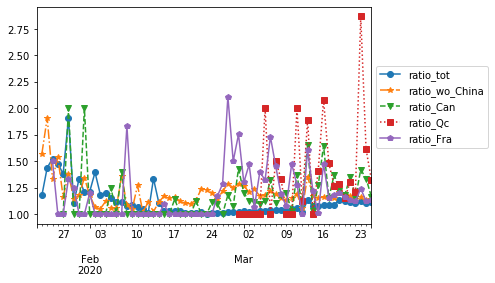

In [42]:
# Ratio
ax_ratio = confirmed[
    ["ratio_tot", "ratio_wo_China", "ratio_Can", "ratio_Qc", "ratio_Fra"]
].plot()
for i, line in enumerate(ax_ratio.get_lines()):
    line.set_marker(markers[i])
    line.set_linestyle(styles[i])
ax_ratio.legend(bbox_to_anchor=(1, 0.75))

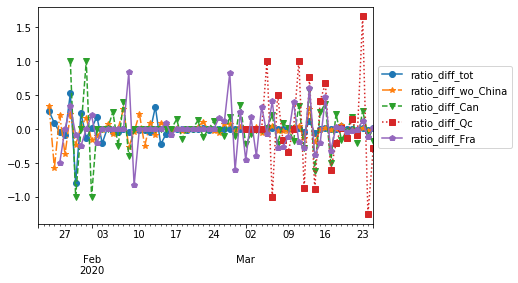

In [43]:
# Ratio diff
ax_ratio = confirmed[
    [
        "ratio_diff_tot",
        "ratio_diff_wo_China",
        "ratio_diff_Can",
        "ratio_diff_Qc",
        "ratio_diff_Fra",
    ]
].plot()
for i, line in enumerate(ax_ratio.get_lines()):
    line.set_marker(markers[i])
    line.set_linestyle(styles[i])
ax_ratio.legend(bbox_to_anchor=(1, 0.75))

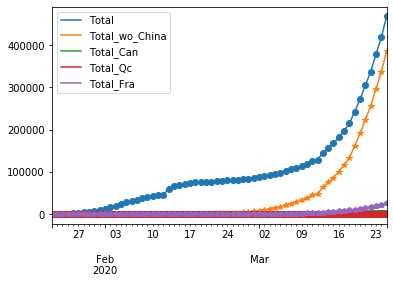

In [44]:
# Cases
ax_total = confirmed[
    ["Total", "Total_wo_China", "Total_Can", "Total_Qc", "Total_Fra"]
].plot()
for i, line in enumerate(ax_total.get_lines()):
    line.set_marker(markers[i])